# **train a simple linear regression model using Numpy**

- supervised learning
- regression

In [21]:
import numpy as np

# load and visualize data in this project
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
lr = 0.0001
epochs = 10000
epoch_verbose = 100

## **Dataset**

In [23]:
df = pd.read_csv("house_price_dataset_1000.csv")
df

,Area,Rooms,BuildingAge,DistanceToCenter,Price
0,134,4,39,2.6,1095
1,115,3,10,6.9,616
2,139,4,2,13.1,1360
3,165,5,5,5.2,1574
4,112,3,8,4.2,1255
...,...,...,...,...,...
995,111,3,5,12.6,828
996,173,5,38,4.8,1070
997,139,4,22,12.2,884
998,102,3,24,14.6,137


In [24]:
x_len = len(df.columns) - 1
dataset_array = df.to_numpy()
x = dataset_array[:, :x_len] # features
y = dataset_array[:, -1] # lables

### Data Preprocessing (Standardization)

In [25]:
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=0)
    return (X - mean) / (std + 1e-8)

In [26]:
X = standardize(x)
X

array([[ 0.47468766,  0.47092644,  1.71932964, -1.43781022],
       [-0.17369951, -0.52049764, -0.81475044, -0.31982249],
       [ 0.64531586,  0.47092644, -1.51380701,  1.29215982],
       ...,
       [ 0.64531586,  0.47092644,  0.23383442,  1.05816239],
       [-0.61733284, -0.52049764,  0.40859857,  1.68215554],
       [ 0.57706458,  0.47092644, -0.11569386, -0.70981821]])

## **First Forwardpropagation**



In [27]:
w = np.random.randn(x_len) # number of features = number of weights
b = 0

In [28]:
y_pred = X.dot(w) + b

In [29]:
y_table = {
  "y_true": y,
  "y_pred": y_pred
}

#load data into a DataFrame object:
ydf = pd.DataFrame(y_table)

print(ydf)

     y_true    y_pred
0    1095.0  1.434448
1     616.0  0.730447
2    1360.0 -0.391876
3    1574.0  3.666796
4    1255.0  1.976037
..      ...       ...
995   828.0 -1.352799
996  1070.0  1.636699
997   884.0 -1.386857
998   137.0 -3.572077
999  1327.0  1.725605

[1000 rows x 2 columns]


## **First Backpropagation**


### Loss Function (MSE)

In [30]:
# MSE = sigma(y_true - y_pred)**2 / N
loss = np.mean((y - y_pred) ** 2)
loss

np.float64(996394.3004238567)

### Optimizer (Gradient Descent)

In [31]:
# gradient = dloss/dw
dw = -2 * X.T.dot(y - y_pred) / len(y)
db = -2 * np.mean(y - y_pred)

# w_new = w_old - lr * gradient
new_w = w - lr * dw
new_b = b - lr * db

In [32]:
w_table = {
    "w_old": w,
    "w_new": new_w,
}

wdf = pd.DataFrame(w_table)
print(wdf)
print()
print("b:", b, "new_b:", new_b)

      w_old     w_new
0  0.245824  0.321716
1  0.736331  0.810803
2 -0.785519 -0.830595
3 -1.614655 -1.640601

b: 0 new_b: 0.1725282


## **Training Cycle**

In [33]:
losses = []
for epoch in range(epochs):
    y_pred = X.dot(w) + b # predition
    loss = np.mean((y - y_pred) ** 2) # validation
    losses.append(loss) # for loss plot

    # optimization
    w -= lr * (-2 * X.T.dot(y - y_pred) / len(y))
    b -= lr * (-2 * np.mean(y - y_pred))

    # monitoring
    if epoch % epoch_verbose == 0:
        print(f"epoch {epoch}, loss: {loss}")

epoch 0, loss: 996394.3004238567
epoch 100, loss: 953683.278113666
epoch 200, loss: 913037.5672028438
epoch 300, loss: 874346.7999455247
epoch 400, loss: 837507.1495211349
epoch 500, loss: 802420.9067468045
epoch 600, loss: 768996.0859637188
epoch 700, loss: 737146.0580051306
epoch 800, loss: 706789.2083073058
epoch 900, loss: 677848.6183668235
epoch 1000, loss: 650251.7688792337
epoch 1100, loss: 623930.2630158884
epoch 1200, loss: 598819.5684085339
epoch 1300, loss: 574858.776515665
epoch 1400, loss: 551990.3781413098
epoch 1500, loss: 530160.0539664273
epoch 1600, loss: 509316.47903598764
epoch 1700, loss: 489411.1402215569
epoch 1800, loss: 470398.16575029586
epoch 1900, loss: 452234.16595711105
epoch 2000, loss: 434878.0844776789
epoch 2100, loss: 418291.05915653345
epoch 2200, loss: 402436.2919967416
epoch 2300, loss: 387278.92752613727
epoch 2400, loss: 372785.93900001753
epoch 2500, loss: 358926.0219017806
epoch 2600, loss: 345669.49424155825
epoch 2700, loss: 332988.2031886084

## **Reports**

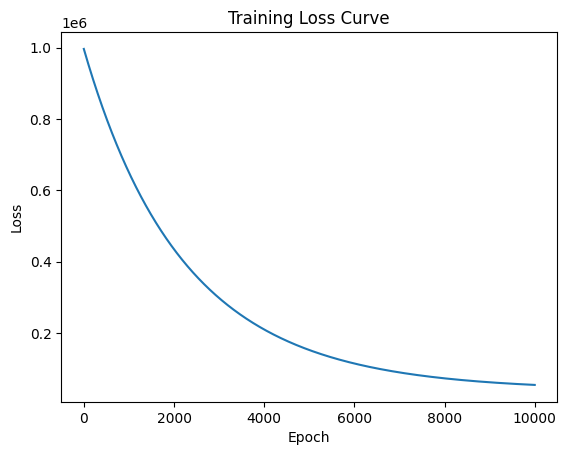

In [34]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.savefig('results/loss_plot.png')
plt.show()